In [1]:
import pandas as pd
import html5lib
from matplotlib import dates
from statsmodels.tsa.filters.hp_filter import hpfilter
from datetime import datetime
%matplotlib inline

In [2]:
#this part reads the table from the web
import urllib.request as request
import csv
r = request.urlopen('https://raw.githubusercontent.com/RamiKrispin/coronavirus-csv/master/coronavirus_dataset.csv').read().decode('utf8').split("\n")
reader = csv.reader(r)
A=[]
for line in reader:
    A.append(line)

In [3]:
#making the dataframe with column names
df = pd.DataFrame(A[1:],columns=A[0])

In [4]:
#converting the cases from object to numeric
df['cases'] = pd.to_numeric(df['cases'])
df.dtypes

Province.State     object
Country.Region     object
Lat                object
Long               object
date               object
cases             float64
type               object
dtype: object

In [5]:
#setting column date as DataFrame index
df['date']=pd.to_datetime(df['date'])
df = df.set_index(df['date'])
df.drop(['date'],axis=1,inplace=True)
#df.head()

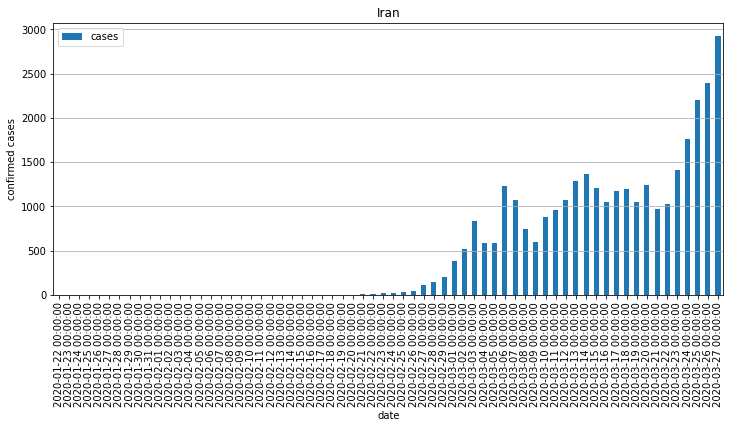

In [6]:
ax = df[(df['Country.Region']=='Iran') & (df['type']=='confirmed')].plot.bar(figsize=[12,5], title='Iran')
ax.set(ylabel='confirmed cases')
ax.yaxis.grid(True)


#df[(df['Country.Region']=='Iran') & (df['type']=='recovered')].plot.line(figsize=[12,5])
#df[(df['Country.Region']=='Iran') & (df['type']=='death')].plot.line(figsize=[12,5])

In [7]:
df['type'].unique()

array(['confirmed', 'death', None], dtype=object)

In [8]:
df.resample(rule='D')

In [9]:
df1 = df[(df['Country.Region']=='Iran') & (df['type']=='confirmed')]

In [11]:
df1['cases_cum'] = df1['cases'].cumsum()

C:\Users\salmam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df1.columns

Index(['Province.State', 'Country.Region', 'Lat', 'Long', 'cases', 'type',
       'cases_cum'],
      dtype='object')

In [13]:
corona_cycle, corona_trend = hpfilter(df1['cases_cum'], lamb=51296000)

In [14]:
df1['trend'] = corona_trend

C:\Users\salmam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


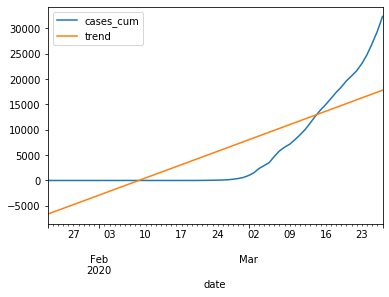

In [15]:
df1[['cases_cum', 'trend']].plot()

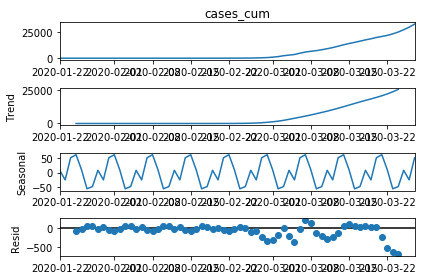

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df1['cases_cum'], model='additive')  # model='mul' also works
result.plot();

In [17]:
df2=df1

In [18]:
df2['EWMA2'] = df2['cases_cum'].ewm(span=2,adjust=False).mean()

C:\Users\salmam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


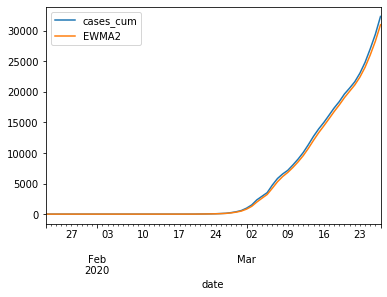

In [19]:
df2[['cases_cum','EWMA2']].plot();

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [21]:
df2['DESadd12'] = ExponentialSmoothing(df2['cases_cum'], trend='add').fit().fittedvalues.shift(-1)

C:\Users\salmam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\salmam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\salmam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\salmam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry po

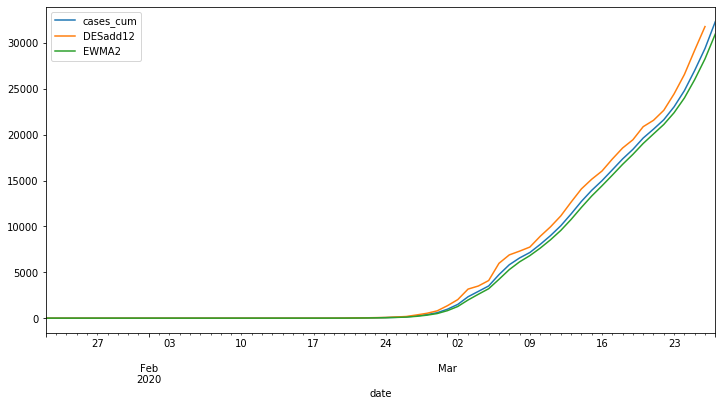

In [22]:
df2[['cases_cum','DESadd12', 'EWMA2']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [23]:
df['cases'].count()

32868